# Data Exploration and Visualization Techniques (Data Understanding Stage)
### Prepared by: <a href="https://www.linkedin.com/in/a-kanaan/">Dr Abdulkarim M. Jamal Kanaan</a> 
<hr>

* Acknowledgements: I would like to acknowledge the book "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow" written by Aurélien Géron. This practical exercise was heavily influenced by Chapter 2 of the book, titled "End-to-End Machine Learning Project." 

Note: try to get insights from a field expert for these steps.

1. Create a copy of the data for exploration (sampling it down to a manageable size if necessary).
2. Create a Jupyter notebook to keep record of your data exploration.
3. Study each attribute and its characteristics:
    - Name
    - Type (categorical, int/float, etc.)
    - % of missing values
    - Noisiness and type of noise (outliers, rounding errors, etc.)
    - Possibly useful for the task?
4. For supervised learning tasks, identify the target attribute(s).
5. Visualize the data.
6. Study the correlations between attributes.

adapted from: https://github.com/ageron/handson-ml3/blob/main/ml-project-checklist.md#explore-the-data

In [17]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

## Loading the dataset

In [18]:
# A. Loading and inspecting the dataset
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

## Take a Quick Look at the Data Structure

In [19]:
#Let’s take a look at the top five rows using the DataFrame’s head() method
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Each entry in the dataset corresponds to a distinct district. The dataset consists of 10 attributes, namely longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, and ocean_proximity.

In [30]:
# Understanding the dataset's structure and dimensions
print("Dataset shape:", housing.shape)
print("Column names:", housing.columns)
print(housing['longitude'].describe())

# Examining the dataset's summary statistics
print("\nSummary statistics:")
print(housing.describe())

Dataset shape: (20640, 10)
Column names: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
count    20640.000000
mean      -119.569704
std          2.003532
min       -124.350000
25%       -121.800000
50%       -118.490000
75%       -118.010000
max       -114.310000
Name: longitude, dtype: float64

Summary statistics:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000    

- The rows for count, mean, min, and max are straightforward and easy to understand. 
    - It is important to note that null values are not considered, so the count values may differ from the total number of rows. 
- The std row represents the standard deviation, which indicates the dispersion of the values.
- The 25%, 50%, and 75% rows represent the corresponding percentiles, indicating the values below which a certain percentage of observations fall. For example, 25% of the districts have a housing_median_age lower than 18, while 50% have a value lower than 29, and 75% have a value lower than 37. These percentiles are also known as the first quartile, median, and third quartile respectively.

The `info()` method provides a convenient way to obtain a concise summary of the data, including the total number of rows, the data types of each attribute, and the count of non-null values for each attribute.

In [21]:
print('\nprints information about a DataFrame including \
the index dtype and columns, non-null values and memory usag')
print(housing.info())


prints information about a DataFrame including the index dtype and columns, non-null values and memory usag
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


- The dataset contains a total of 20,640 entries, which can be considered relatively small in the context of Machine Learning. However, it is a suitable dataset to begin with. It is worth noting that the total_bedrooms attribute has 20,433 non-null values, indicating that 207 districts do not have this particular feature recorded. We will address this issue later on.
- All the attributes in the dataset are numeric, except for the ocean_proximity field. This field is of type "object," which means it can hold any Python object. However, since the data was loaded from a CSV file, it is known that the ocean_proximity attribute is a text attribute. You can determine the categories present in the data and the count of districts belonging to each category by utilizing the `value_counts()` method.

In [22]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

To gain a better understanding of the data type, you can create histograms for each numerical attribute. A histogram visualizes the distribution of instances based on the value ranges. You can plot the histogram for one attribute at a time or use the hist() method on the entire dataset, which will generate histograms for all the numerical attributes simultaneously.

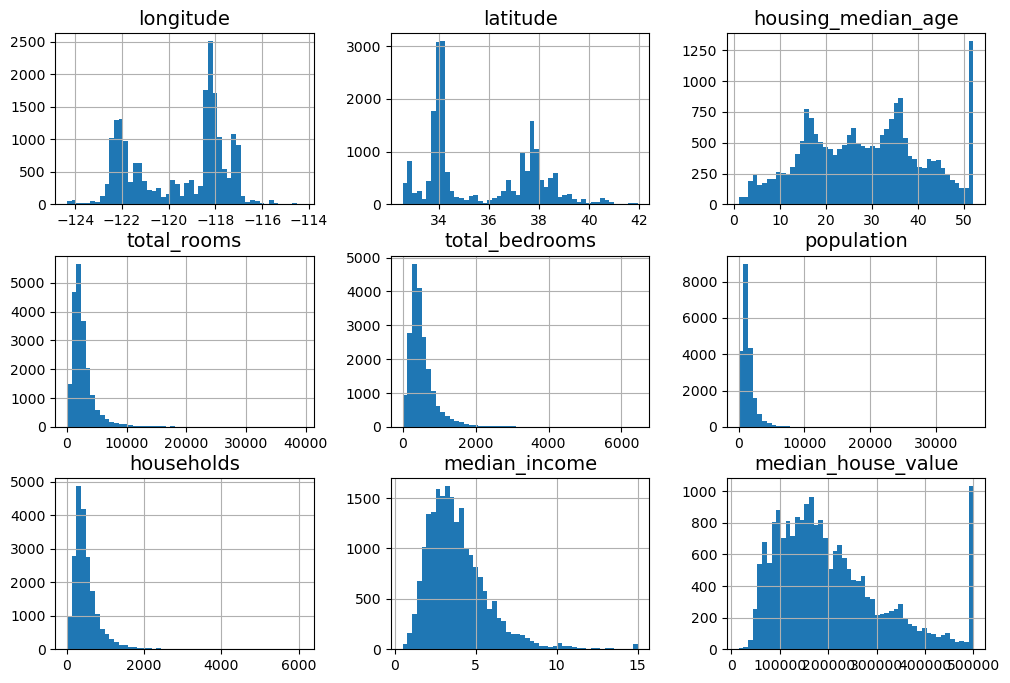

In [23]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
plt.show()

Here are some observations to note from these histograms:

- The median income attribute appears to be scaled and capped. According to the data collection team, values above a certain threshold were scaled to 15 (15.0001) and values below another threshold were scaled to 0.5 (0.4999). These numbers roughly represent tens of thousands of dollars, but it's important to understand how the data was processed.
- The housing median age and median house value attributes were also capped. This can be a concern, especially for the target attribute (median house value) as it may limit the learning capabilities of your machine learning algorithms. Consult with your client team to determine if this is an issue and whether precise predictions beyond $500,000 are required. 
    - In such cases, you may consider collecting proper labels for the capped districts or removing them from the training and test sets.
- The attributes exhibit different scales, which we will further explore in this chapter when discussing feature scaling.
- Many histograms show a tail-heavy distribution, extending more to the right of the median than to the left (skewed right). This can pose challenges for some machine learning algorithms in detecting patterns. We can address this by applying transformations to achieve more bell-shaped distributions.

## Create Testset

* Setting aside part of the data at this stage may seem strange. However, it helps prevent overfitting(memorizing) and `data snooping bias`, ensuring more reliable model performance in the long run.
* Randomly select a subset of instances, usually around 20% (or a smaller portion for large datasets), and separate them from the rest of the dataset.

In [24]:
from sklearn.model_selection import train_test_split


train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print("Length of train_set:", len(train_set))
print("Length of test_set:", len(test_set))

Length of train_set: 16512
Length of test_set: 4128


## Discover and Visualize the Data to Gain Insights
At this stage, it's important to delve deeper into the data after having obtained a preliminary understanding. However, before proceeding, ensure that the test set is separated and that you are focusing solely on exploring the training set.

In [25]:
# Exploring categorical variables
categorical_columns = ['ocean_proximity']
for column in categorical_columns:
    print("\nUnique values in", column)
    print(train_set[column].unique())
    print("Value counts:")
    print(train_set[column].value_counts())

# Analyzing numerical variables
numerical_columns = [
    'longitude', 'latitude', 'housing_median_age', 'total_rooms',
    'total_bedrooms', 'population', 'households', 'median_income',
    'median_house_value'
]

for column in numerical_columns:
    print("\nStatistics for", column)
    print("Minimum:", train_set[column].min())
    print("Maximum:", train_set[column].max())
    print("Mean:", train_set[column].mean())
    print("Standard deviation:", train_set[column].std())


Unique values in ocean_proximity
['NEAR OCEAN' 'NEAR BAY' '<1H OCEAN' 'INLAND' 'ISLAND']
Value counts:
<1H OCEAN     7313
INLAND        5276
NEAR OCEAN    2091
NEAR BAY      1827
ISLAND           5
Name: ocean_proximity, dtype: int64

Statistics for longitude
Minimum: -124.35
Maximum: -114.31
Mean: -119.56512051841085
Standard deviation: 1.9993226604249457

Statistics for latitude
Minimum: 32.54
Maximum: 41.95
Mean: 35.63125242248062
Standard deviation: 2.1336699906142376

Statistics for housing_median_age
Minimum: 1.0
Maximum: 52.0
Mean: 28.592720445736433
Standard deviation: 12.618367060318981

Statistics for total_rooms
Minimum: 2.0
Maximum: 32627.0
Mean: 2635.5159278100773
Standard deviation: 2142.925653596407

Statistics for total_bedrooms
Minimum: 1.0
Maximum: 6445.0
Mean: 538.9234203926845
Standard deviation: 418.20280736940543

Statistics for population
Minimum: 3.0
Maximum: 35682.0
Mean: 1428.1231225775193
Standard deviation: 1134.0438619704528

Statistics for households
Mini

## Visualizing Geographical Data
Given the presence of geographical information in the form of latitude and longitude, it is advisable to generate a scatterplot encompassing all districts as a means to visualize the data.

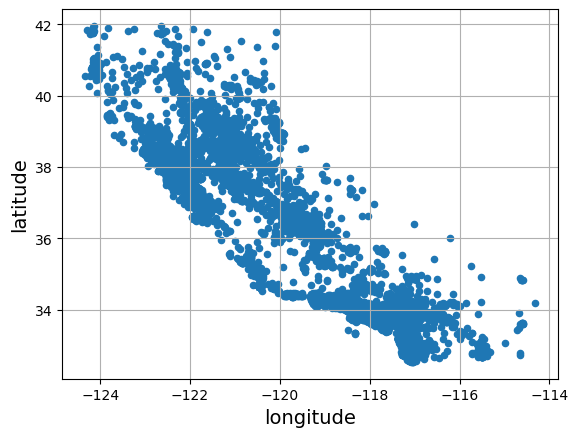

In [26]:
train_set.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

The displayed scatterplot clearly depicts the geographic region of California. However, apart from that, it is challenging to discern any specific patterns. By setting the alpha option to 0.1, the visualization becomes more conducive to identifying areas with a high density of data points.

<Axes: xlabel='longitude', ylabel='latitude'>

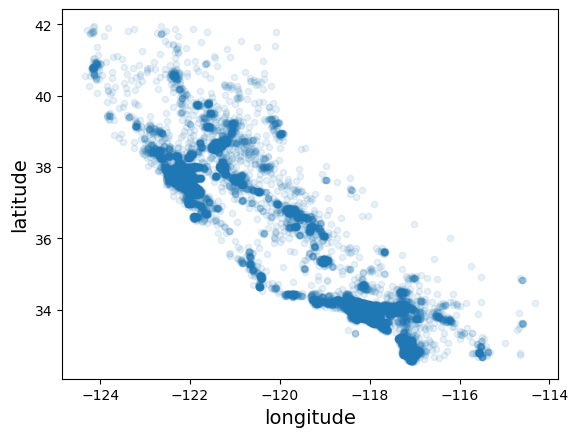

In [27]:
train_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

The revised scatterplot provides a much clearer depiction of the high-density areas. These areas include the Bay Area, Los Angeles, San Diego, and a notable concentration in the Central Valley, particularly around Sacramento and Fresno.

Afterward, an examination of the housing prices is conducted. In this analysis, the population of each district is represented by the radius of the circles (using the option 's'), while the price is depicted by the color of the circles (using the option 'c'). For the visualization, a predefined color map called 'jet' is utilized, which spans from blue to red, indicating low to high values, respectively.

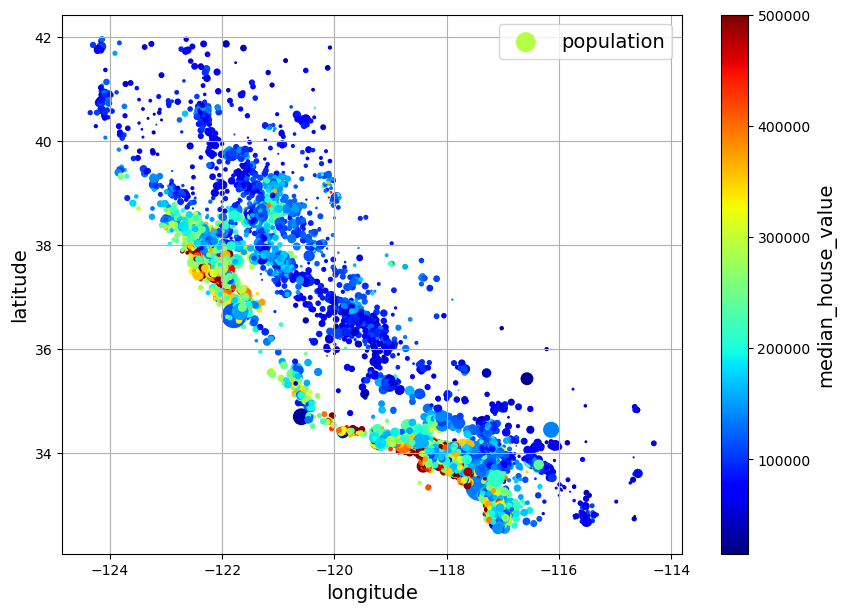

In [28]:
train_set.plot(
    kind="scatter", x="longitude", y="latitude", grid=True,
    s=train_set["population"] / 100, label="population",
    c="median_house_value", cmap="jet", colorbar=True,
    legend=True, sharex=False, figsize=(10, 7))
plt.show()

This image provides evidence of the strong correlation between housing prices and location factors such as proximity to the ocean, as well as population density, which might already be known.

## Looking for Correlations
Calculate the standard correlation coefficient, also known as Pearson's r, for each pair of attributes using the `corr()` method.

In [31]:
corr_matrix = train_set.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687013
total_rooms           0.134060
housing_median_age    0.104714
households            0.065798
total_bedrooms        0.049993
population           -0.025820
longitude            -0.043603
latitude             -0.146324
Name: median_house_value, dtype: float64

The correlation coefficient, which can vary from -1 to 1, indicates the strength and direction of the relationship between two variables. A coefficient close to 1 suggests a strong positive correlation, such as when the median house value increases as the median income increases. Conversely, a coefficient close to -1 indicates a strong negative correlation, like the slight negative correlation observed between latitude and median house value (where prices tend to decrease slightly as you move north). Coefficients near 0 indicate no linear correlation between the variables.

You can also utilize the scatter_matrix() function in Pandas to examine the correlation between different attributes. This function generates scatter plots that showcase the relationship between each numerical attribute and every other numerical attribute in the dataset.

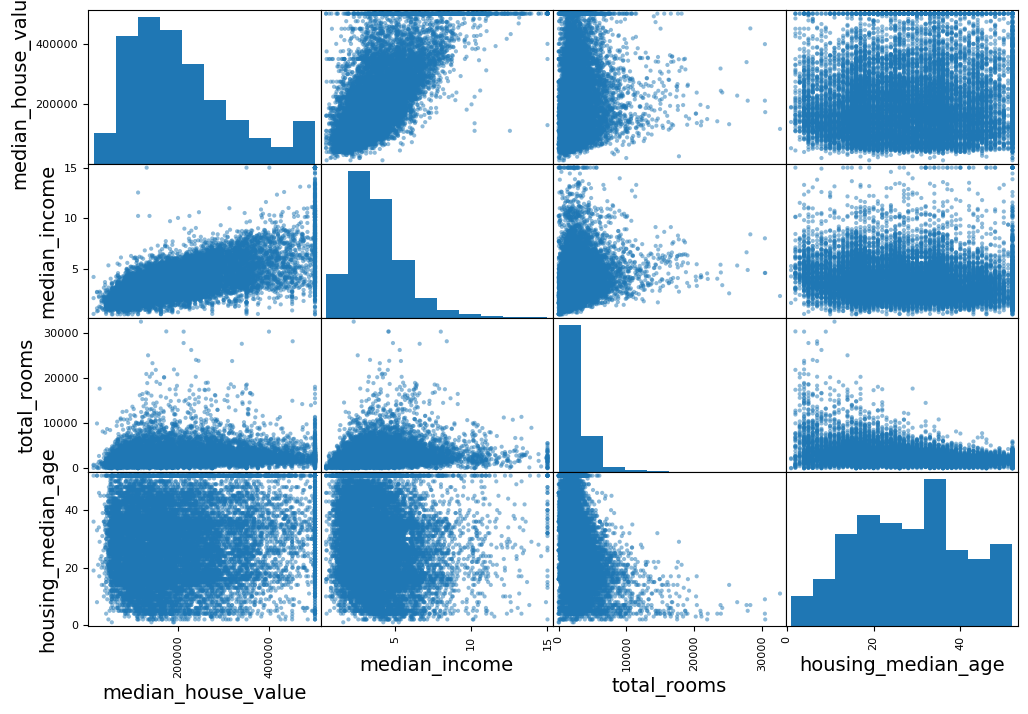

In [14]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(train_set[attributes], figsize=(12, 8))
plt.show()

Upon reviewing the scatterplots depicting correlation, it appears that the most promising attribute for predicting the median house value is the median income. So let’s zoom in on their correlation scatterplot 

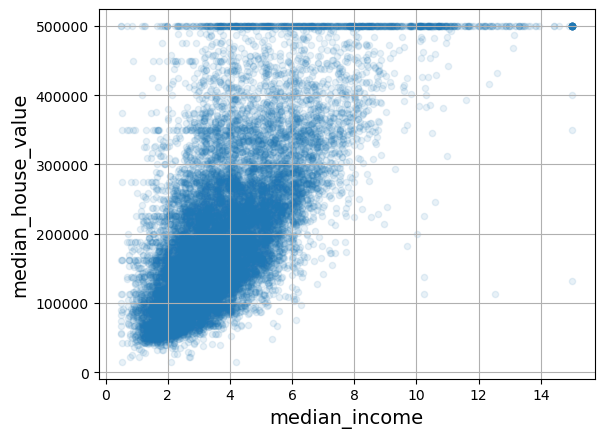

In [15]:
train_set.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
plt.show()

The plot provides several insights. 
- Firstly, it confirms a significant and noticeable correlation with a clear upward trend, as the points are tightly clustered. 
- Secondly, the previously identified price cap at `$500,000` is clearly depicted as a horizontal line. However, the plot also reveals additional less prominent horizontal lines, such as around `$450,000`, `$350,000`, and possibly `$280,000`, along with a few more below that. To avoid the algorithms from learning these specific data patterns, it is recommended to consider removing the corresponding districts.

Data exploration and visualization are critical steps in any machine learning project. They provide valuable insights, guide feature selection and engineering, support data cleaning and preprocessing, facilitate effective communication of findings, and aid in model evaluation and interpretation. By leveraging these techniques, you can make informed decisions, build more accurate models, and derive meaningful insights from your data.